# Prosper Loan Analysis
### Introduction
Prosper Marketplace, Inc. is a San Francisco, California-based company in the peer-to-peer lending industry. Prosper Funding LLC, one of its subsidiaries, operates Prosper.com, a website where individuals can either invest in personal loans or request to borrow money.    

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.    

This analysis is interested in investigating the factors that affect a loan’s outcome status. Especially, the analysis chooses 'Term', 'LoanStatus', 'ProsperRating (numeric)', 'AmountDelinquent', 'DebtToIncomeRatio', 'IncomeRange', 'LoanOriginalAmount','CreditScoreRangeUpper', 'CreditScoreRangeLower', 'AvailableBankcardCredit', 'IsBorrowerHomeowner' as variables of interests in attempt to explore their relationships with loan outcome.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')

In [3]:
df.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

### Data Wrangling

In [5]:
#Remain only the variables of interests as a copy of the dataset
df_1 = df[['ListingKey', 'ListingNumber', 'Term', 'LoanStatus', 'ProsperRating (numeric)', 'AmountDelinquent', 
          'DebtToIncomeRatio', 'IncomeRange', 'LoanOriginalAmount','CreditScoreRangeUpper', 'CreditScoreRangeLower', 
           'AvailableBankcardCredit', 'IsBorrowerHomeowner']]

In [6]:
df_1.head(5)

,ListingKey,ListingNumber,Term,LoanStatus,ProsperRating (numeric),AmountDelinquent,DebtToIncomeRatio,IncomeRange,LoanOriginalAmount,CreditScoreRangeUpper,CreditScoreRangeLower,AvailableBankcardCredit,IsBorrowerHomeowner
0,1021339766868145413AB3B,193129,36,Completed,NaN,472.0,0.17,"$25,000-49,999",9425,659.0,640.0,1500.0,True
1,10273602499503308B223C1,1209647,36,Current,6.0,0.0,0.18,"$50,000-74,999",10000,699.0,680.0,10266.0,False
2,0EE9337825851032864889A,81716,36,Completed,NaN,NaN,0.06,Not displayed,3001,499.0,480.0,NaN,False
3,0EF5356002482715299901A,658116,36,Current,6.0,10056.0,0.15,"$25,000-49,999",10000,819.0,800.0,30754.0,True
4,0F023589499656230C5E3E2,909464,36,Current,3.0,0.0,0.26,"$100,000+",15000,699.0,680.0,695.0,True


In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
ListingKey                 113937 non-null object
ListingNumber              113937 non-null int64
Term                       113937 non-null int64
LoanStatus                 113937 non-null object
ProsperRating (numeric)    84853 non-null float64
AmountDelinquent           106315 non-null float64
DebtToIncomeRatio          105383 non-null float64
IncomeRange                113937 non-null object
LoanOriginalAmount         113937 non-null int64
CreditScoreRangeUpper      113346 non-null float64
CreditScoreRangeLower      113346 non-null float64
AvailableBankcardCredit    106393 non-null float64
IsBorrowerHomeowner        113937 non-null bool
dtypes: bool(1), float64(6), int64(3), object(3)
memory usage: 10.5+ MB


In [8]:
#We'd like to drop all our missing data
df_1 = df_1.dropna()

In [9]:
#Rename columns for convenience
df_1.rename(columns={"ProsperRating (numeric)": "ProsperRating"}, inplace=True)

## Univariate Analysis

### Loan Status

In [10]:
#First, change this variable to a categorical variable
df_1.LoanStatus = df_1.LoanStatus.astype('category')

In [11]:
#Understand the status types
df_1.LoanStatus.value_counts()

Current                   52478
Completed                 17703
Chargedoff                 4445
Defaulted                   885
Past Due (1-15 days)        722
Past Due (31-60 days)       327
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       242
FinalPaymentInProgress      189
Past Due (>120 days)         14
Name: LoanStatus, dtype: int64

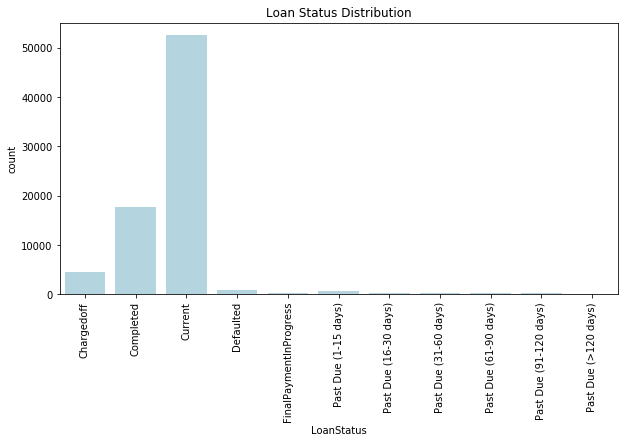

In [67]:
#Use bar plot to observe the counts of each loan status
plt.figure(figsize=(10,5))
sb.countplot(data=df_1, x='LoanStatus', color='lightblue')
plt.xticks(rotation=90)
plt.title('Loan Status Distribution');

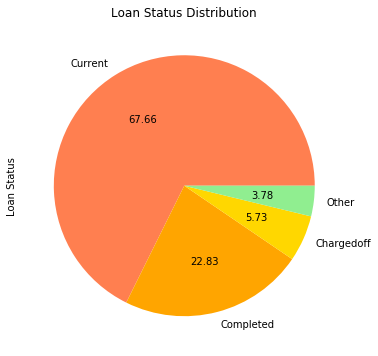

In [66]:
#Loan status on a pie chart
df_1['Loan Status'] = np.where(df_1.LoanStatus.isin(['Current', 'Completed', 'Chargedoff']), df_1.LoanStatus, 'Other')
labels=['Current', 'Completed', 'Chargedoff', 'Other']
plt.figure(figsize=(6,6))
df_1['Loan Status'].value_counts().plot(kind='pie', autopct='%.2f',
                                   colors=['coral','orange','gold','lightgreen'],
                                   labels=labels)
plt.title('Loan Status Distribution');

We can see that most of the loans are current. For the loans that are not current, most of them are completed.

### Term

In [14]:
df_1.Term.value_counts()

36    53000
60    23143
12     1414
Name: Term, dtype: int64

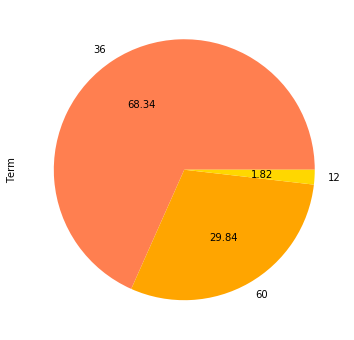

In [15]:
#Term counts on a pie chart
labels=['36', '60', '12']
plt.figure(figsize=(6,6))
df_1.Term.value_counts().plot(kind='pie', autopct='%.2f',
                                   colors=['coral','orange','gold'],
                                   labels=labels);

We can see that most of the loan terms are 36 months.

### Propser Rating

In [16]:
#View some statistics for the column
print('The max of prosper rating is ' , df_1['ProsperRating'].max())
print('The min of prosper rating is ' , df_1['ProsperRating'].min())
print('The standard deviation of prosper rating is ' , df_1['ProsperRating'].std())

The max of prosper rating is  7.0
The min of prosper rating is  1.0
The standard deviation of prosper rating is  1.6588081250044457


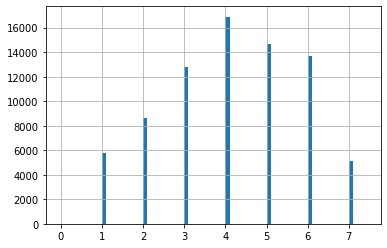

In [17]:
#Try to visualize it with histogram
bins=np.arange(0, 7.5, 0.1)
df_1.ProsperRating.hist(bins=bins);

We notice that the variable is acctually categorical

In [18]:
df_1.ProsperRating = df_1.ProsperRating.astype('category')

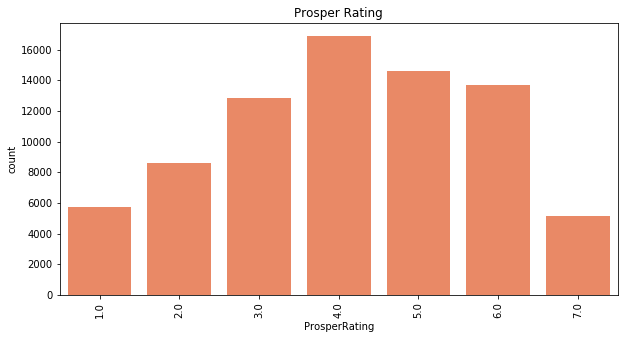

In [19]:
#Use bar plot to observe the counts of ratings more clearly
plt.figure(figsize=(10,5))
sb.countplot(data=df_1, x='ProsperRating', color='coral')
plt.xticks(rotation=90)
plt.title('Prosper Rating');

We can see that most people have prosper ratings of 4 or above.

### Home Owner

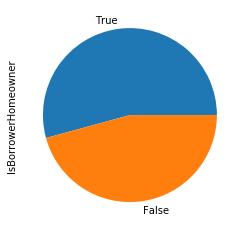

In [20]:
df_1.IsBorrowerHomeowner.value_counts().plot(kind="pie");

In [21]:
df_1.IsBorrowerHomeowner.value_counts()

True     42069
False    35488
Name: IsBorrowerHomeowner, dtype: int64

In [22]:
print("Percent of homeowner is:", 42069/(42069+35488))

Percent of homeowner is: 0.5424268602447232


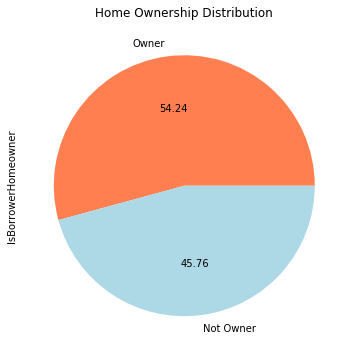

In [68]:
#we can try to generate a more detailed pie chart
labels=['Owner', 'Not Owner']
plt.figure(figsize=(6,6))
df_1.IsBorrowerHomeowner.value_counts().plot(kind='pie', autopct='%.2f',
                                   colors=['coral','lightblue'],
                                   labels=labels)
plt.title('Home Ownership Distribution');

## Bivariate Analysis

Given the above univariate analysis, some of the bivariate relationship that I am interested in exploring are:
    
1. debt to income ratio and loan status
2. loan original amount and loan status
3. home owner and loan status
    
However before starting to explore bivariate relationship, I wish to create a new column that combines the categories of loan status so that all past due are combined into one.

In [24]:
update = {'Current': 'Current', 'Completed': 'Completed','Chargedoff': 'Chargedoff',
        'Defaulted': 'Defaulted', 'Past Due (1-15 days)': 'Past Due',
        'Past Due (16-30 days)': 'Past Due', 'Past Due (31-60 days)': 'Past Due',
        'Past Due (61-90 days)': 'Past Due', 'Past Due (91-120 days)': 'Past Due', 
        'Past Due (>120 days)':'Past Due', 'FinalPaymentInProgress':'FinalPaymentInProgress',
        'Cancelled':'Cancelled'}

In [25]:
df_1['LoanStatusNew'] = df_1.LoanStatus.map(update).astype("category", inplace = True)

In [26]:
df_1.LoanStatusNew.value_counts() #check if the categories were set up properly

Current                   52478
Completed                 17703
Chargedoff                 4445
Past Due                   1857
Defaulted                   885
FinalPaymentInProgress      189
Name: LoanStatusNew, dtype: int64

### Debt to income ratio and loan status

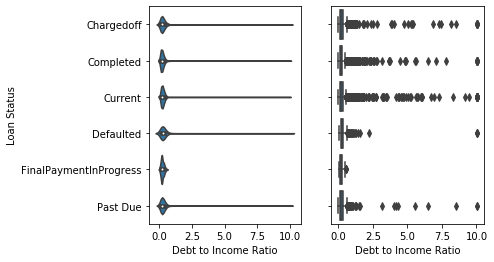

In [47]:
#after the univariate analyses, we can explore some pairs of relationships between variables
#first let's explore the relationship between debt to income ratio and loan status

#draw a violin plot and a box plot to see the relationship between these two variables
fig, ax = plt.subplots(1,2)

base_color = sb.color_palette()[0]

sb.violinplot(data = df_1, 
                  y = 'LoanStatusNew', 
                  x = 'DebtToIncomeRatio', orient = 'h',
                  color = base_color, ax = ax[0])
ax[0].set_ylabel('Loan Status')
ax[0].set_xlabel('Debt to Income Ratio')

sb.boxplot(data = df_1, 
                  y = 'LoanStatusNew', 
                  x = 'DebtToIncomeRatio', orient = 'h',
                  color = base_color, ax = ax[1])
ax[1].set_yticklabels([])
ax[1].set_ylabel('')
ax[1].set_xlabel('Debt to Income Ratio')

plt.tight_layout;


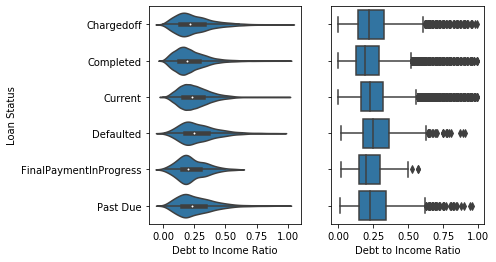

In [48]:
# we can see the plots are not indicative as expected; so we try to limit the outliers
#draw a violin plot and a box plot to see the relationship between these two variables:
fig, ax = plt.subplots(1,2)

base_color = sb.color_palette()[0]

sb.violinplot(data = df_1[df_1.DebtToIncomeRatio < 1], 
                  y = 'LoanStatusNew', 
                  x = 'DebtToIncomeRatio', orient = 'h',
                  color = base_color, ax = ax[0])
ax[0].set_ylabel('Loan Status')
ax[0].set_xlabel('Debt to Income Ratio')

sb.boxplot(data = df_1[df_1.DebtToIncomeRatio < 1], 
                  y = 'LoanStatusNew', 
                  x = 'DebtToIncomeRatio', orient = 'h',
                  color = base_color, ax = ax[1])
ax[1].set_yticklabels([])
ax[1].set_ylabel('')
ax[1].set_xlabel('Debt to Income Ratio')

plt.tight_layout;

We can see that the defaulted loans tend to have a higher debt to income ratio, but the difference is not significant

### Loan Original Amount and Loan Status

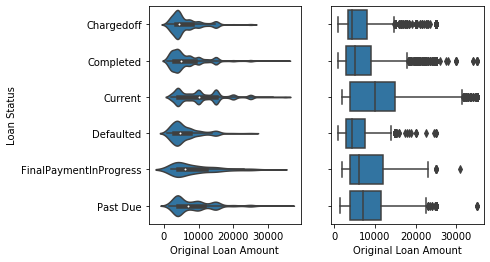

In [50]:
#similarly, we can observe the relationship between loan original amount and loan status
fig, ax = plt.subplots(1,2)

base_color = sb.color_palette()[0]

sb.violinplot(data = df_1, 
                  y = 'LoanStatusNew', 
                  x = 'LoanOriginalAmount', orient = 'h',
                  color = base_color, ax = ax[0])
ax[0].set_ylabel('Loan Status')
ax[0].set_xlabel('Original Loan Amount')

sb.boxplot(data = df_1, 
                  y = 'LoanStatusNew', 
                  x = 'LoanOriginalAmount', orient = 'h',
                  color = base_color, ax = ax[1])
ax[1].set_yticklabels([])
ax[1].set_ylabel('')
ax[1].set_xlabel('Original Loan Amount')

plt.tight_layout;

We observe that our current loans have a higher average original loan amount

### Credit Score Lower Range and Loan Status

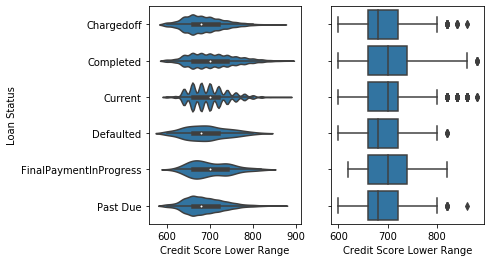

In [60]:
#as credit score lower range indicates how "bad" can a borrower's credit gets, it is worth examining here as well
fig, ax = plt.subplots(1,2)

base_color = sb.color_palette()[0]

sb.violinplot(data = df_1, 
                  y = 'LoanStatusNew', 
                  x = 'CreditScoreRangeLower', orient = 'h',
                  color = base_color, ax = ax[0])
ax[0].set_ylabel('Loan Status')
ax[0].set_xlabel('Credit Score Lower Range')

sb.boxplot(data = df_1, 
                  y = 'LoanStatusNew', 
                  x = 'CreditScoreRangeLower', orient = 'h',
                  color = base_color, ax = ax[1])
ax[1].set_yticklabels([])
ax[1].set_ylabel('')
ax[1].set_xlabel('Credit Score Lower Range')

plt.tight_layout;

Loans that are completed, current and in final payment progress have higher credit score lower range than the other

### Home Owner and Loan Status

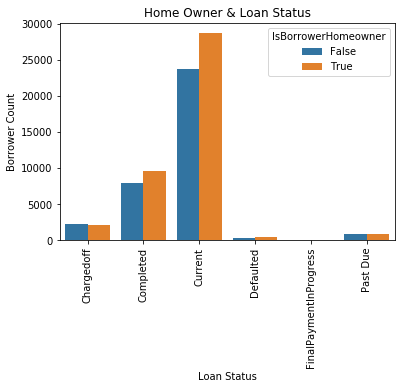

In [71]:
#home ownership can also be an interesting factor to influence loan status
sb.countplot(data = new, x = 'LoanStatusNew', hue = 'IsBorrowerHomeowner')
plt.xticks(rotation=90)
plt.title('Home Owner & Loan Status')
plt.ylabel('Borrower Count')
plt.xlabel('Loan Status');

We can see that current and completed loans have a majority of home owners, whereas for the charged offs, more people are not home owners.

## Multivariate Analysis

### How are credit score lower range and home ownership associated with loan status?

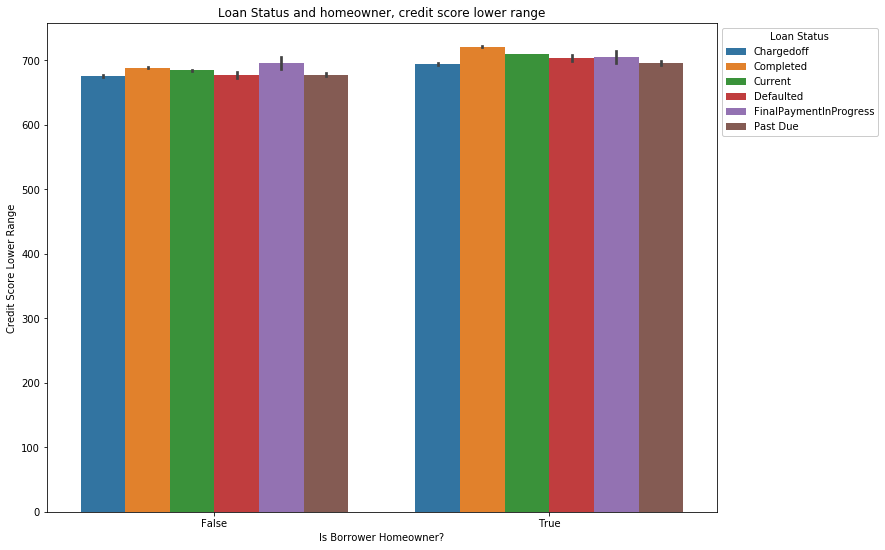

In [70]:
#now, we know that a lot of the variables interact with each other, so it makes sense to examine some multivariate relationships
#we can start with the credi score lower range and home ownership with loan status
plt.figure(figsize=(12,9))
ax = sb.barplot(data = df_1, x = 'IsBorrowerHomeowner', 
                y = 'CreditScoreRangeLower', 
                hue = 'LoanStatusNew')
ax.legend(bbox_to_anchor=(1,1), framealpha = 1, title = 'Loan Status')
plt.xlabel('Is Borrower Homeowner?')
plt.ylabel('Credit Score Lower Range')
plt.title('Loan Status and homeowner, credit score lower range');


From the graph, we can see that 1. borrowers who own homes generally have higher credit score lower range 2. completed loan borrowers have higher credit score lower range than all other borrowers for the home owners, but not for the ones who own no property

### How are original loan amount and income range associated with loan status?

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


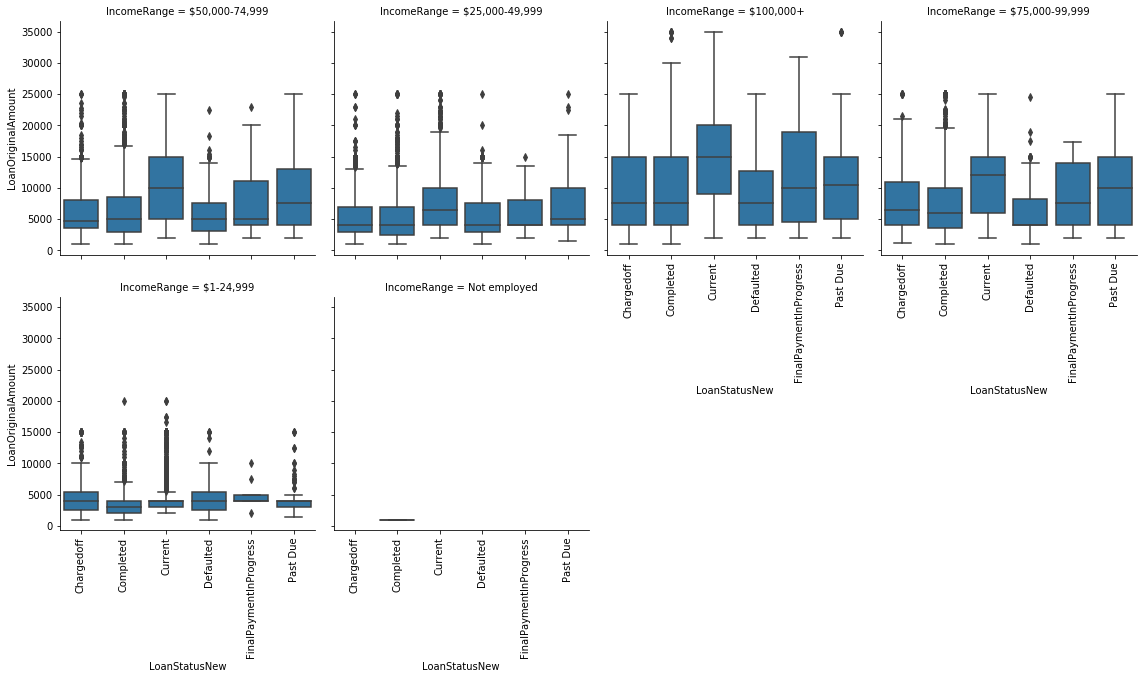

In [32]:
#original loan amount and income range with loan status can also be illustrative, as income range is almost definitely associated with loan amount
g = sb.FacetGrid(data = df_1, col = 'IncomeRange', height = 4, col_wrap = 4)
g.map(sb.boxplot, 'LoanStatusNew', 'LoanOriginalAmount')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];

We notice that current loans generally have higher original amount. The defauted loans, on the other hand, tend to have lower original amount. As income range gets higher, the loan amount predictably gets higher.

### How are original loan amount and home ownership associated with loan status?

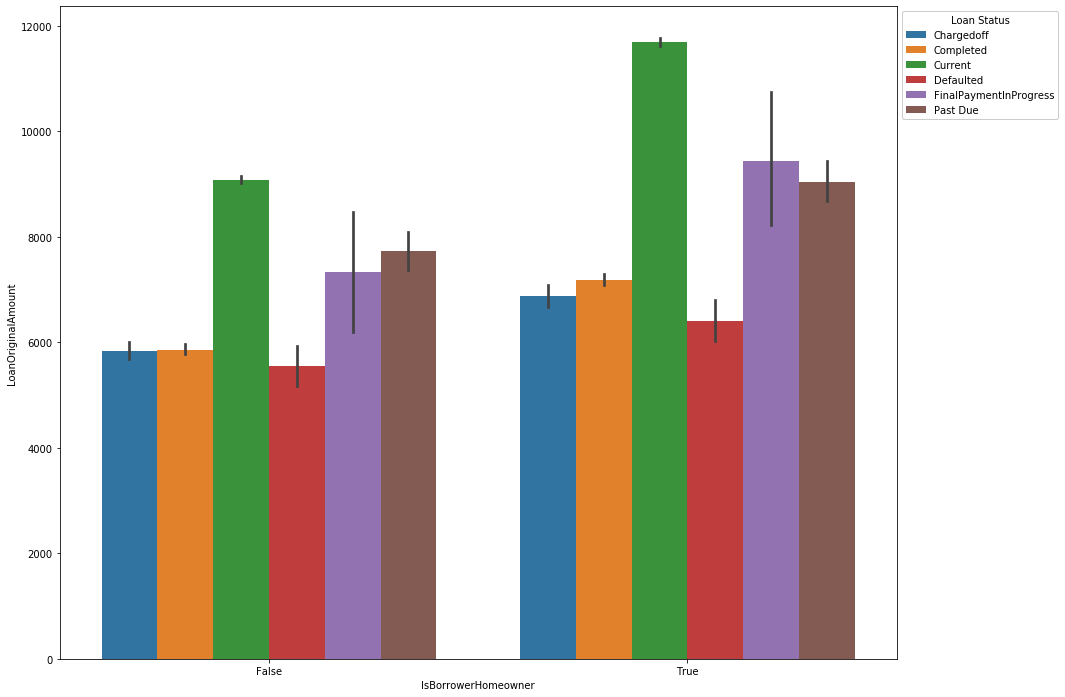

In [56]:
#we might also wonder that loans can be associated with big expenses such as home purchase
plt.figure(figsize=(15,12))
ax = sb.barplot(data = df_1, x = 'IsBorrowerHomeowner', 
                y = 'LoanOriginalAmount', 
                hue = 'LoanStatusNew')
ax.legend(bbox_to_anchor=(1,1), framealpha = 1, title = 'Loan Status');

Across home ownership, current loans have significantly greater loan amount.

### How are income range and credit score lower range associated with loan status?

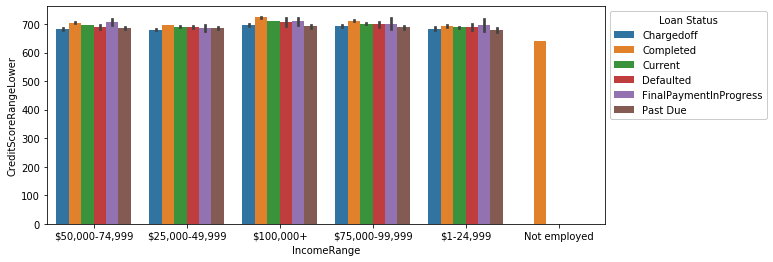

In [58]:
#lastly, whether there is a relationship between income range and credit score lower range is worth investigating
plt.figure(figsize=(10,4))
ax = sb.barplot(data = new, x = 'IncomeRange', y = 'CreditScoreRangeLower', hue = 'LoanStatusNew')
ax.legend(bbox_to_anchor=(1,1), framealpha = 1, title = 'Loan Status');


We can see that for borrowers in all income ranges, the completed loan borrowers have generally higher credit score lower range than the current loan borrowers.

### Summary:  
From various analyses, we can get well-rounded picture of loan status with regard to our variables of interest.  
1. In the univariate analyses, we found that most loans are current or completed. Charged-offs only comprise a small portion of all the loans and defaulted loans are even more insignificant. Most borrowers own at least a home, and most loans have terms of 36 months.  
2. From the bivariate analyses, current loans have a slightly higher debt-to-loan ratio than the completed loans, implying higher risks that the current loans are bearing. Also, for the loans that are charged-off, defaulted and past due, their borrowers are less likely to be home owners.  
3. In multivariate analyses, the relationships between credit score lower range, home ownership and loan status are investigated. We found that completed loan borrowers have higher credit score lower range than all other borrowers for the home owners, but not for the ones who own no property. For the associations between original loan amount, income range and loan status, we notice that current loans generally have higher original amount. The defauted loans, on the other hand, tend to have lower original amount. As income range gets higher, the loan amount predictably gets higher.

### Limitations:  
1. Firstly, the outcome variable is categorical, making it difficult to generate a quantitative output using scatter plot.
2. The amount of variables (81 of them) makes it difficult to sift the variables that are crucial to the outcome variable.